# TITANIC LOGISTIC REGRESSION

# CODE TO PERFORM LOGISTIC REGRESSION
# Dr. Ryan @STEMplicity


PROBLEM STATEMENT
The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

Sex: Sex

Age: Age in years

Sibsp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Target class: Survived: Survival (0 = No, 1 = Yes)

# STEP #0: LIBRARIES IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# STEP #1: IMPORT DATASET

In [2]:
training_set =  pd.read_csv('Train_Titanic.csv')

In [3]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
training_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
training_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# STEP #2: EXPLORE/VISUALIZE DATASET

In [9]:
# Counting the NO. of Survivors and Non-Survivors 
# Varaible names do not accept hyphen(-), but accept uknderscore(_)
survived = training_set[training_set['Survived'] == 1]
no_survived = training_set[training_set['Survived'] == 0]  

In [10]:
# Count the survived and deceased 
print("Total = ", len(training_set))

print("Number of Survived passengers  = ", len(survived))
print("Percentage Survived =", 1 * len(survived)/len(training_set) * 100, "%") 
      
print("Did not Survive =", len(no_survived))
print("Percentage who did not survive =", 1.*len(no_survived)/len(training_set)*100.0, "%")

Total =  891
Number of Survived passengers  =  342
Percentage Survived = 38.38383838383838 %
Did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


<Axes: xlabel='Pclass', ylabel='count'>

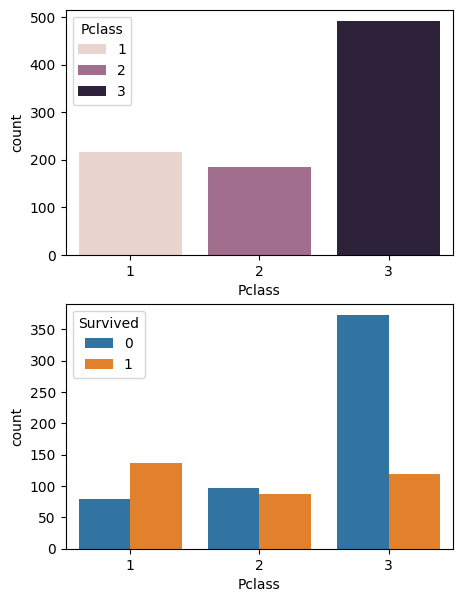

In [11]:
# Bar Chart to indicate the number of people survived based on their class
# If you are a first class, you have a higher chance of survival

plt.figure(figsize=[5,7])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set, hue = 'Pclass')
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = training_set)

<Axes: xlabel='SibSp', ylabel='count'>

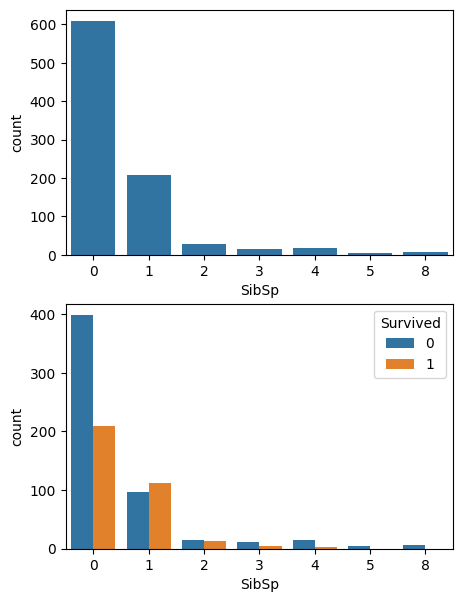

In [12]:
# Bar Chart to indicate the number of people survived based on their siblings status
# If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared to being alone (SibSp = 0)
plt.figure(figsize=[5,7])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data=training_set)

<Axes: xlabel='Parch', ylabel='count'>

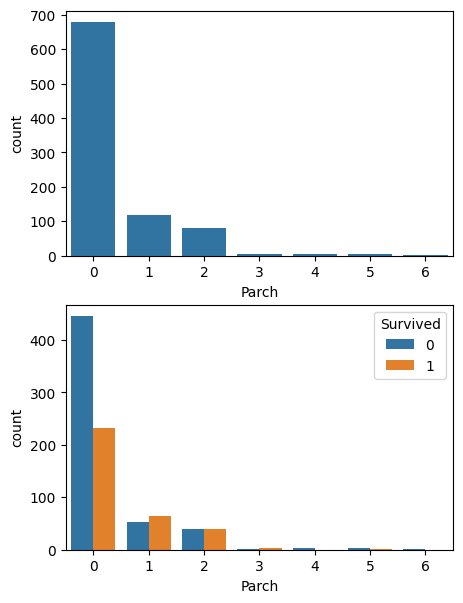

In [13]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize=[5,7])
plt.subplot(211)
sns.countplot(x = 'Parch', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data=training_set)

<Axes: xlabel='Embarked', ylabel='count'>

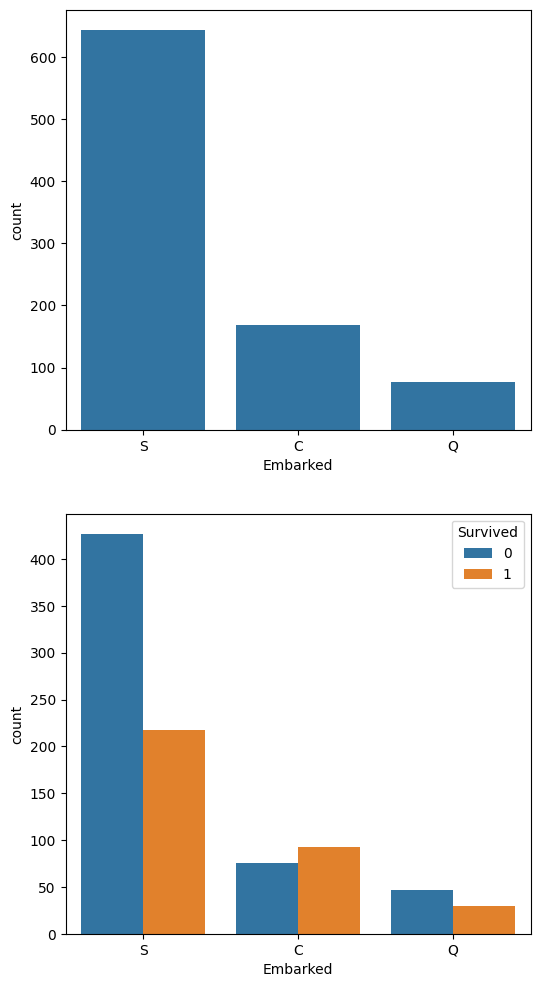

In [14]:
# Bar Chart to indicate the number of people survived based on the port they emparked from
# Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# If you embarked from port "C", you have a higher chance of survival compared to other ports!
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set)

<Axes: xlabel='Sex', ylabel='count'>

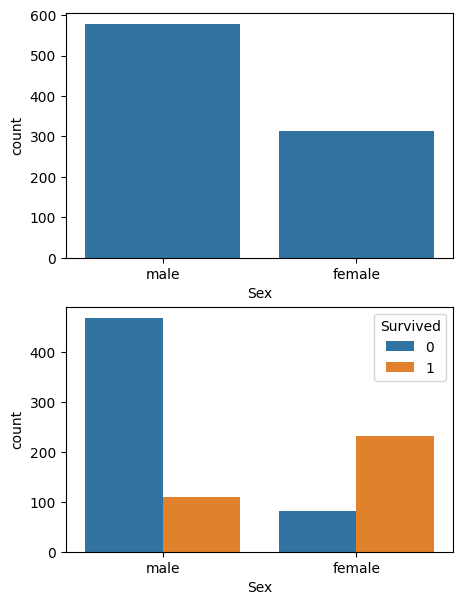

In [15]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize=[5,7])
plt.subplot(211)
sns.countplot(x = 'Sex', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data=training_set)

<Axes: xlabel='Age', ylabel='count'>

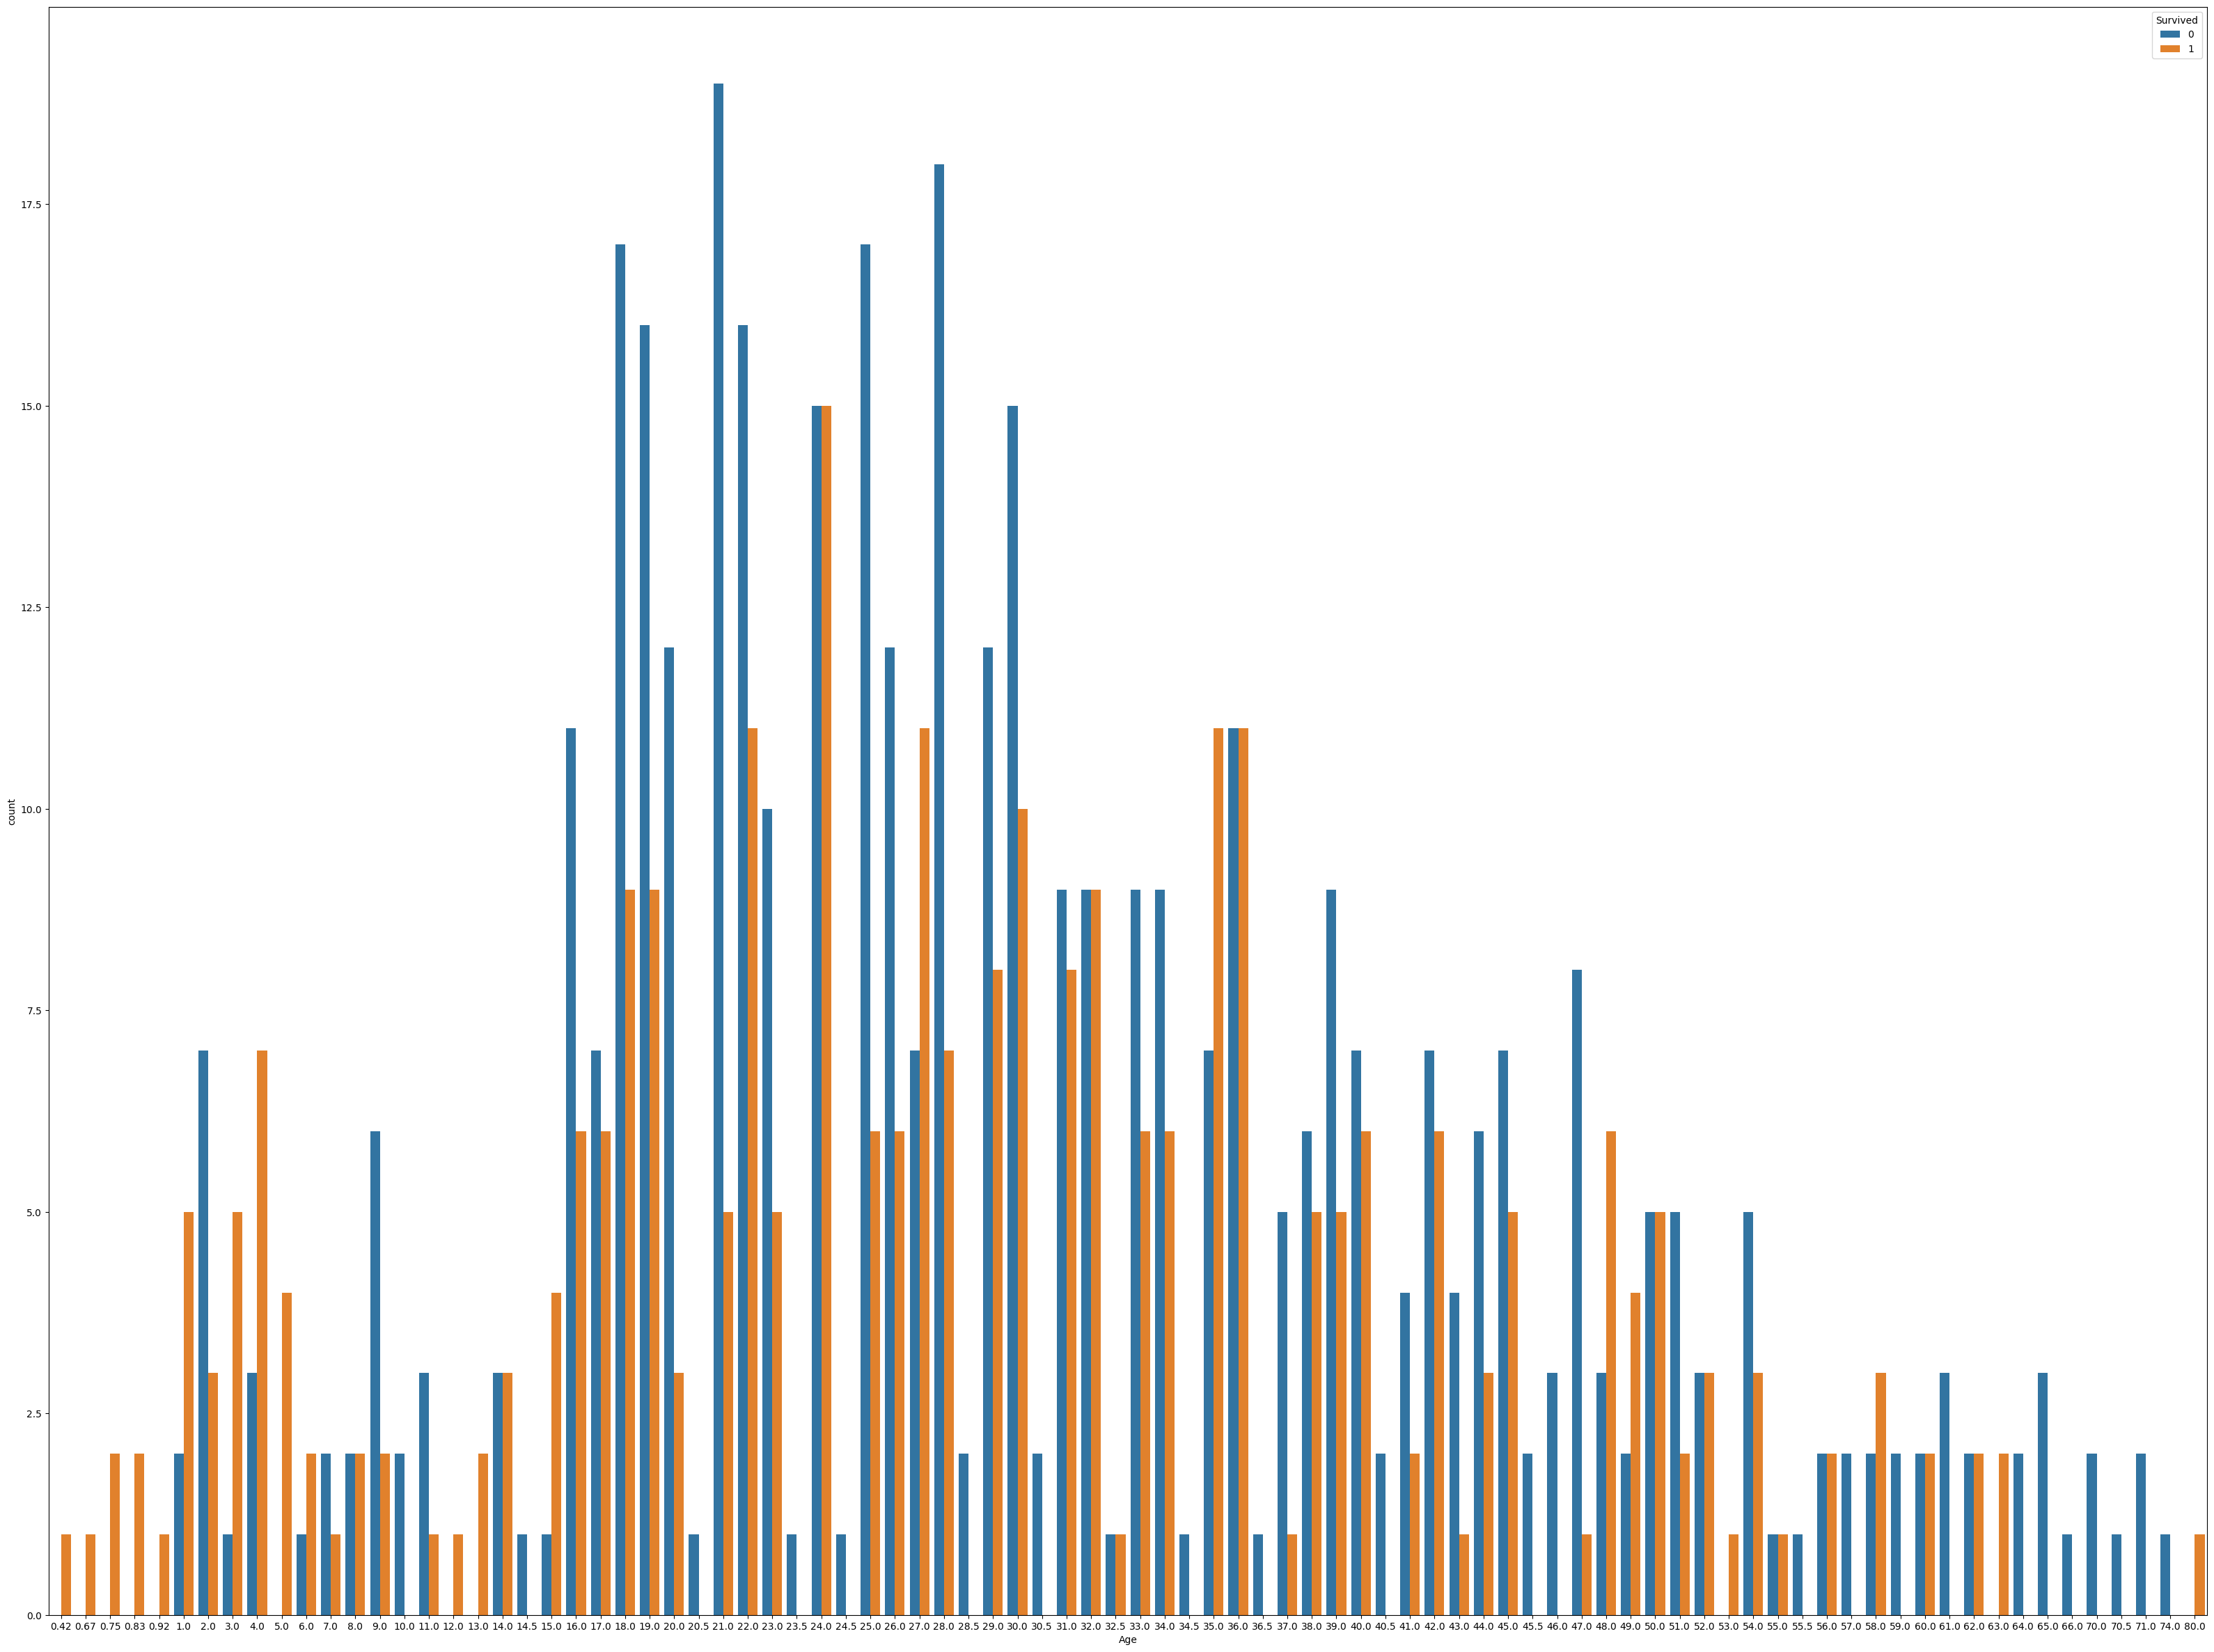

In [16]:
# Bar Chart to indicate the number of people survived based on their age
# If you are a baby, you have a higher chance of survival
plt.figure(figsize=(40,30))
sns.countplot(x = 'Age', hue = 'Survived', data=training_set)

<Axes: >

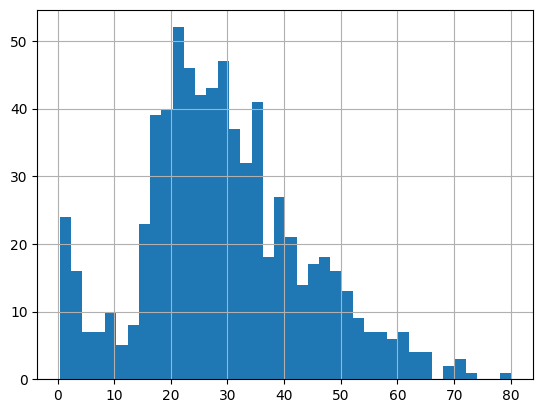

In [17]:
# Age Histogram 
training_set['Age'].hist(bins = 40)

<Axes: xlabel='Fare', ylabel='count'>

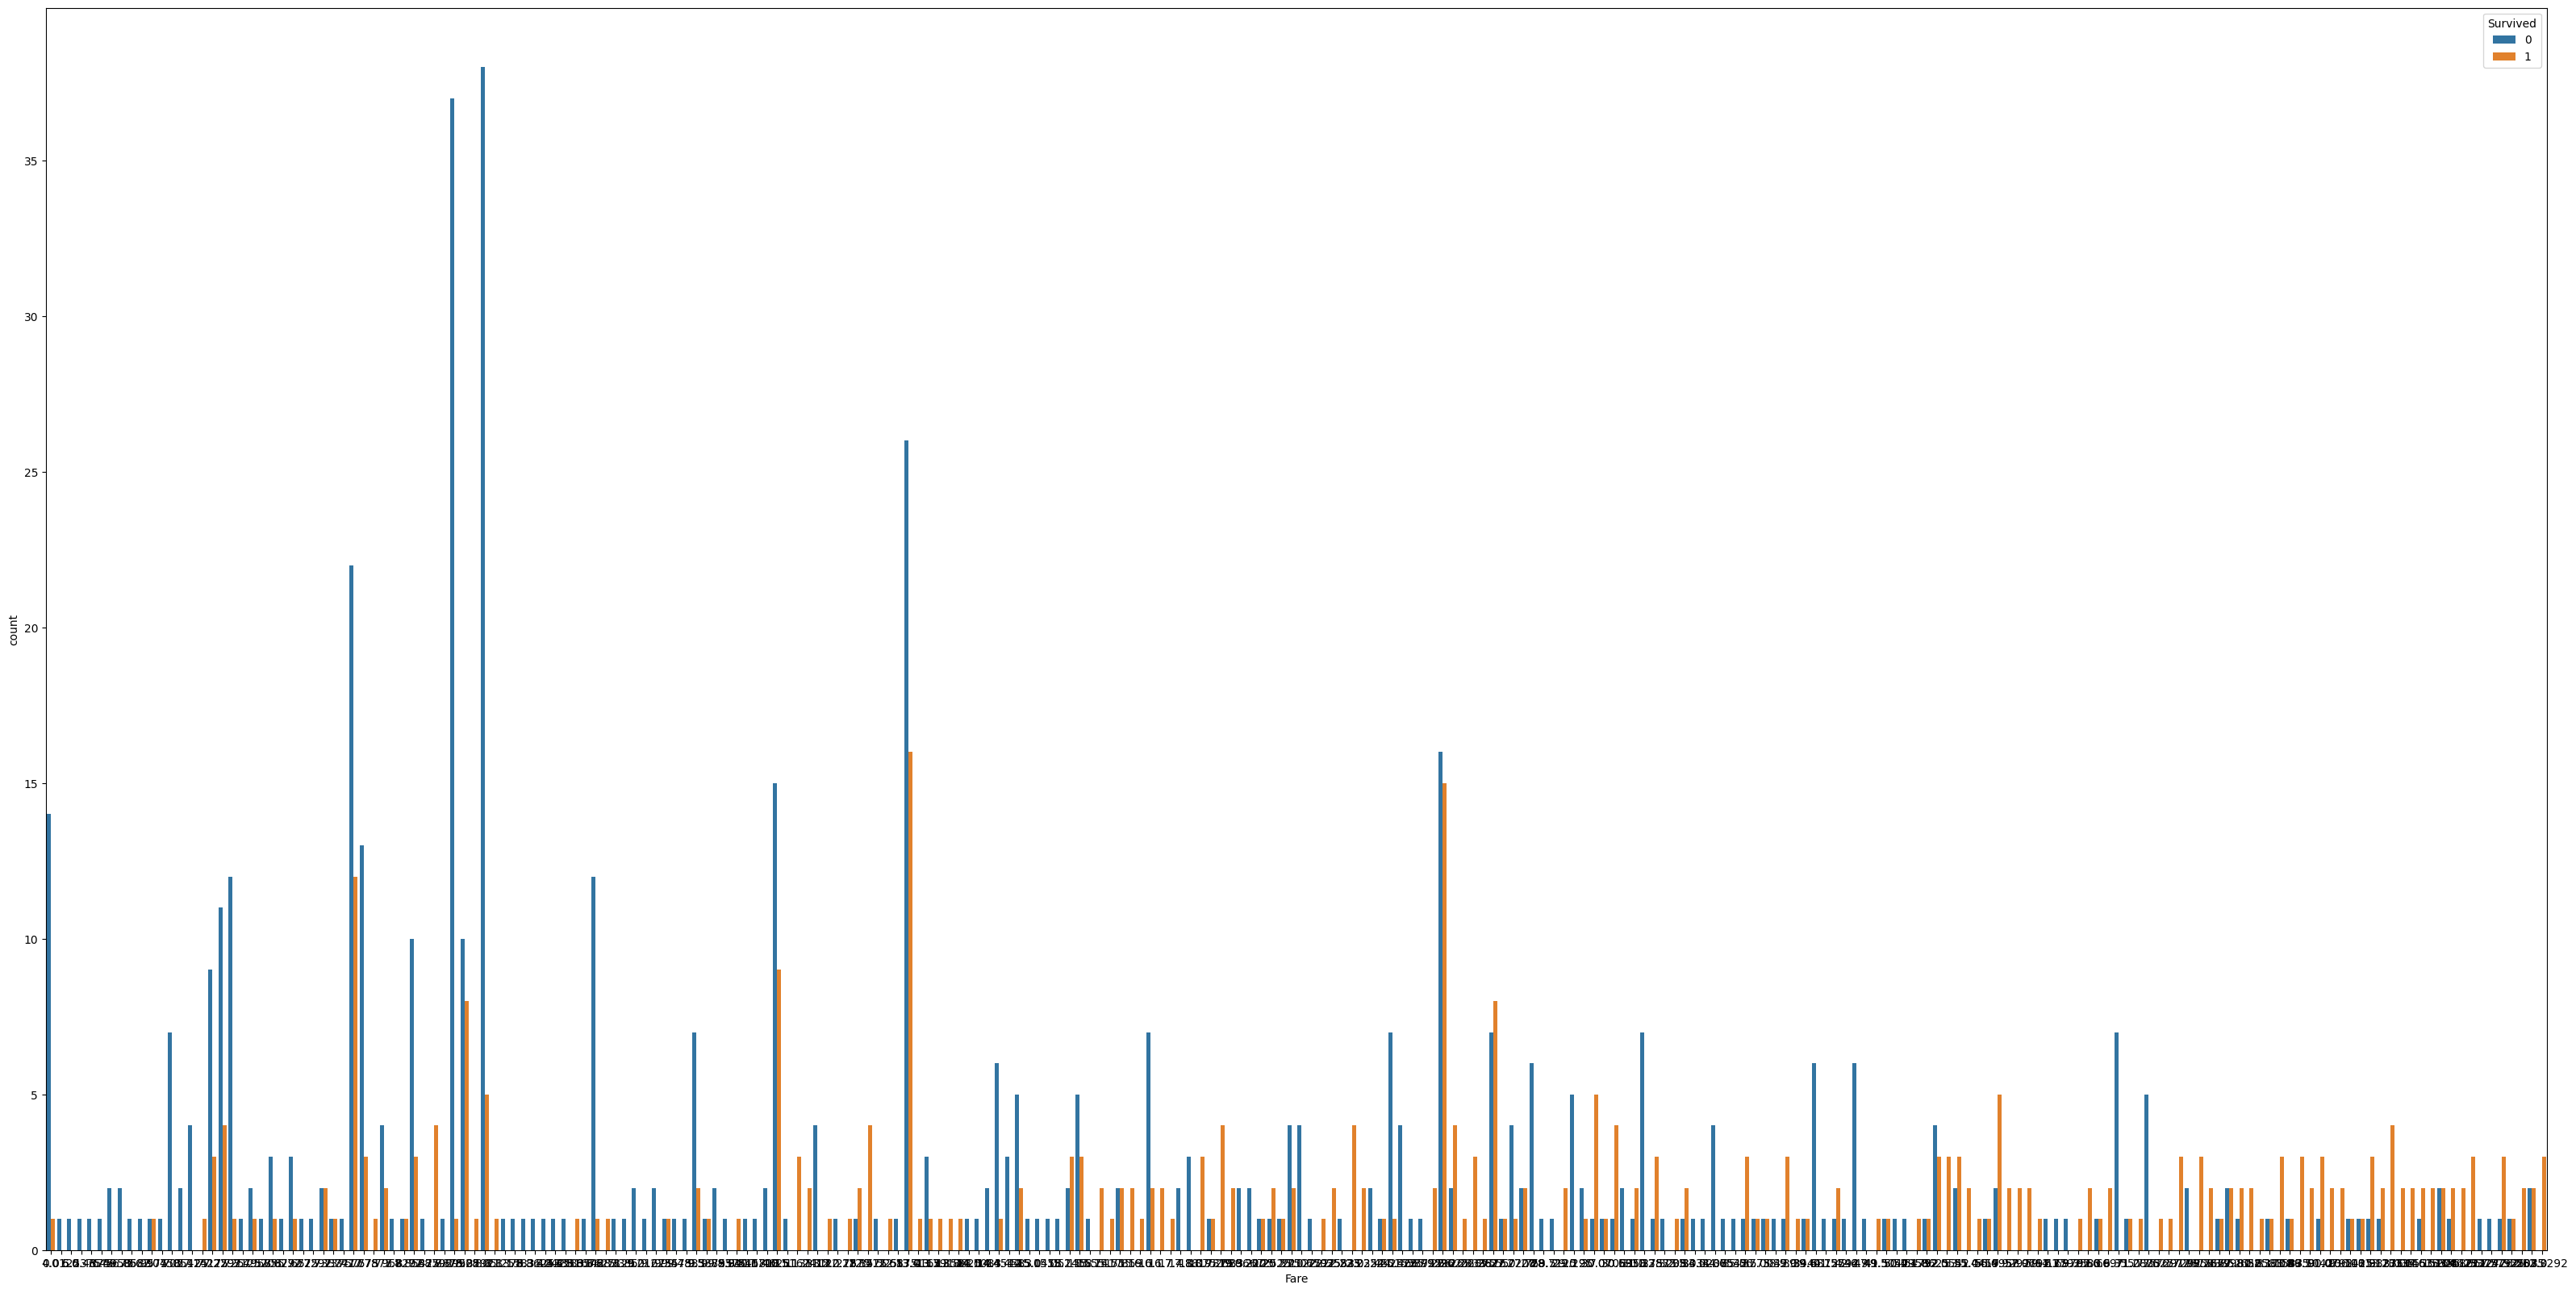

In [18]:
# Bar Chart to indicate the number of people survived based on their fare
# If you pay a higher fare, you have a higher chance of survival
plt.figure(figsize=(40,20))
sns.countplot(x = 'Fare', hue = 'Survived', data=training_set)

<Axes: >

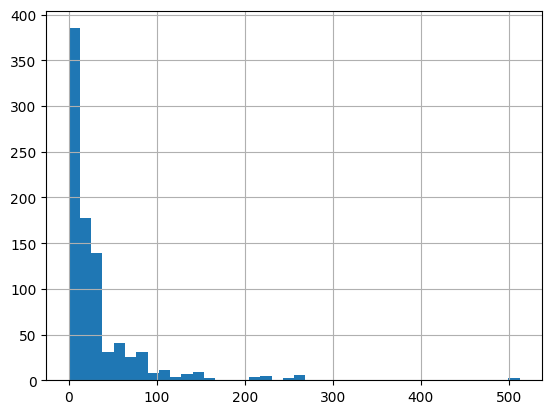

In [19]:
# Fare Histogram 
training_set['Fare'].hist(bins = 40)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING

<Axes: >

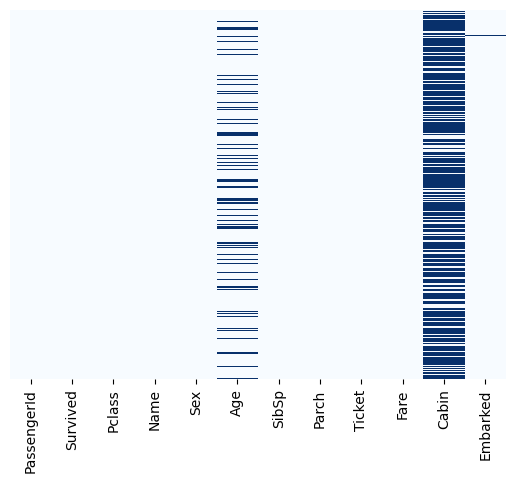

In [20]:
# Let's explore which dataset is missing
sns.heatmap(training_set.isnull(),yticklabels = False, cbar = False, cmap="Blues")

In [21]:
# Let's drop the cabin coloumn and test with inplace = true and false
# training_set.drop('Cabin',axis=1,inplace=False)
training_set.drop('Cabin',axis=1,inplace=True)

In [22]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [23]:
#Let's drop the embarked as well
training_set.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<Axes: >

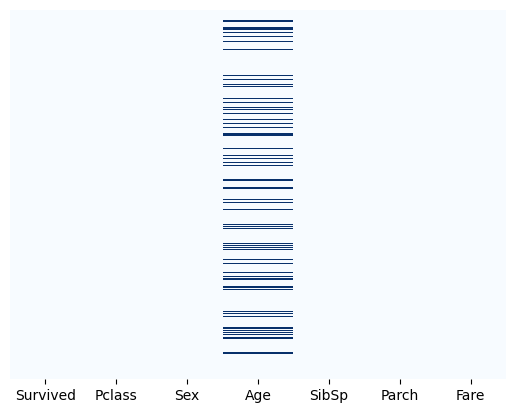

In [24]:
# Let's view the data one more time!
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<Axes: xlabel='Sex', ylabel='Age'>

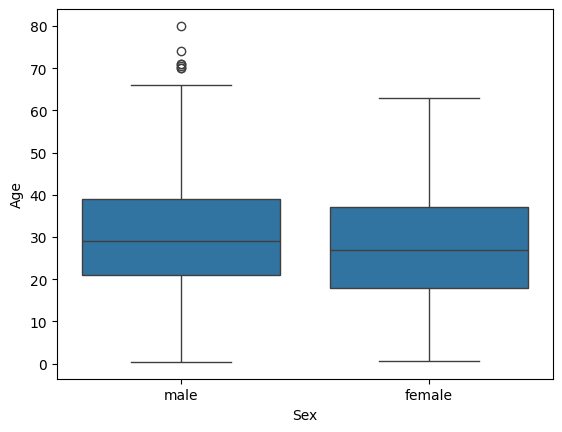

In [25]:
# Let's get the average age for male (~29) and female (~25)
# plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=training_set)

In [26]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age

In [27]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

<Axes: >

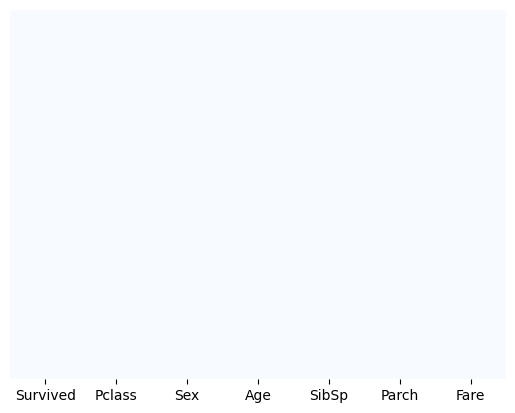

In [28]:
# Let's view the data one more time!
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [29]:
pd.get_dummies(training_set['Sex'])
# You just need one column only to represent male or female

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [30]:
male = pd.get_dummies(training_set['Sex'], drop_first = True)

In [31]:
male

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [32]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [33]:
# first let's drop the sex 
training_set.drop(['Sex'], axis=1, inplace=True)
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [34]:
# Now let's add the encoded column male again
training_set = pd.concat([training_set, male], axis=1)
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,25.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


# STEP#4: MODEL TRAINING

In [35]:
#Let's drop the target coloumn before we do train test split
X = training_set.drop('Survived',axis=1).values
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 25.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

In [36]:
y = training_set['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# STEP#5: MODEL TESTING

In [40]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<Axes: >

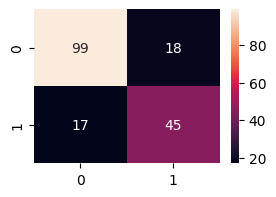

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d")

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

